In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats, special

In [ ]:
def LCG(a, c, M, x0, n):
    seq = [np.mod(a*x0+c,M)]
    for i in range(n-1):
        seq.append(np.mod(a*seq[i]+c, M))
    return seq

In [ ]:
a = 5
c = 1
M = 16
run = np.array(LCG(a,c,M,3,10000))/M

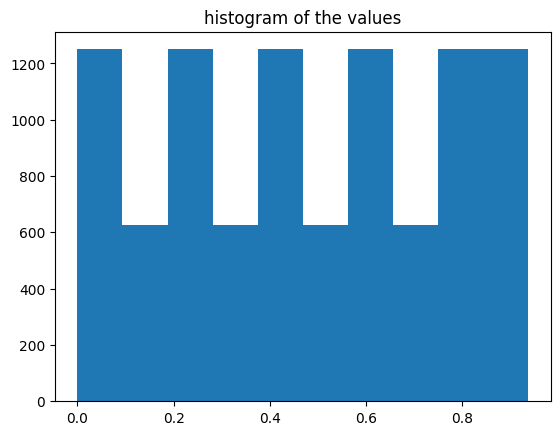

In [ ]:
plt.hist(run, bins = 10)
plt.title('histogram of the values')
plt.show()

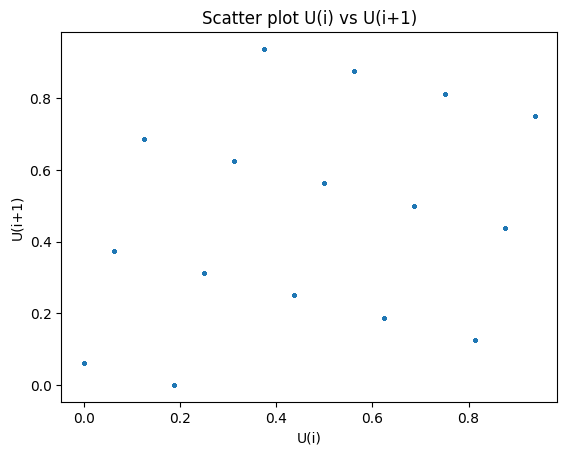

In [ ]:
plt.scatter(run[:-1], run[1:], s = 3)
plt.title('Scatter plot U(i) vs U(i+1)')
plt.xlabel('U(i)')
plt.ylabel('U(i+1)')
plt.show()

Chi squared test

In [ ]:
def chisq(run, k):
    observed = np.histogram(run, k)[0]
    expected = np.ones(k, dtype=int)*(len(run)/k)
    p = 1-stats.chi2.cdf(np.sum((observed - expected)**2/expected), df = k - 1)
    return np.sum((observed - expected)**2/expected), p, observed

k = 10
T, p, o = chisq(run, k)
T, p

(937.5, 0.0)

KS test

In [ ]:
def KS(run):
    n = len(run)
    sorted_run = sorted(run)
    hypothized = np.linspace(0, 1, n)
    D = max(abs(np.array(sorted_run) - np.array(hypothized)))
    T =  (np.sqrt(n) + 0.12 + (0.11/np.sqrt(n))) * D
    return T, D

def KS2(run):
    sorted_run = sorted(run)
    run_unique = np.unique(sorted_run)
    Fn_unique = np.zeros(len(run_unique))
    for i in range(len(run_unique)):
        Fn_unique[i] = np.sum(sorted_run == run_unique[i])
    Fn_unique = np.cumsum(Fn_unique)/len(run)
    Fn = np.zeros(len(run))
    for i in range(len(run_unique)):
        mask = sorted_run == run_unique
        Fn[mask] = Fn_unique[i]
    D = np.max(np.abs(Fn - sorted_run))
    T =  (np.sqrt(n) + 0.12 + (0.11/np.sqrt(n))) * D
    return T, D, run_unique

n = len(run)
T, Dn = KS(run)
p = 1 - stats.kstwobign.cdf(T)
stats.kstest(np.array(run), cdf = 'uniform'), KS(run), p


(KstestResult(statistic=0.0625, pvalue=2.112988817772465e-34),
 (6.25756875, 0.0625),
 0.0)

Run test 1 (Above/below)

In [ ]:
def runTest1(run):
    med = np.median(run)
    n1 = np.sum(run > med)
    n2 = np.sum(run <= med)

    runs = 0
    above = run[0] > med
    for x in run[1:]:
        if((above == True) and (x<=med)):
            runs+=1
            above = False
        if((above == False) and (x>med)):
            runs+=1
            above=True
    runs +=1
    mean = 2*n1*n2/(n1+n2)
    var = 2*n1*n2/(n1+n2)**2/(n1+n2-1)*(2*n1*n2-n1-n2)
    return 2*(1 - stats.norm.cdf(np.abs(runs-mean), 0, np.sqrt(var))), runs

pvalue, runs = runTest1(run)
pvalue, runs


(0.0, 3751)

Run test 2 (Up/Down)

In [ ]:
def runTest2(run):
    runs = np.sum(np.ediff1d(run)<0)+1
    A = 0



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

Geometric Distribution

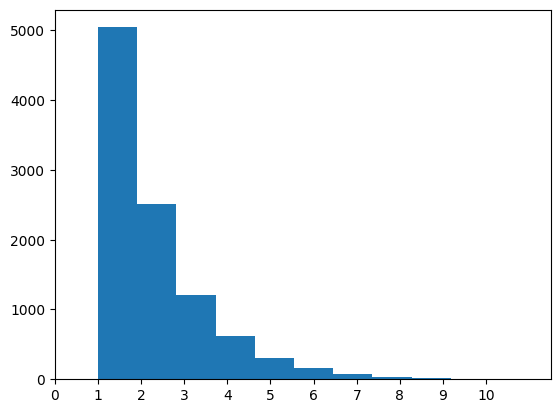

In [ ]:
def getGeo(p = 0.5, size = 10000):
    us = np.random.uniform(0, 1, size)
    x = np.floor(np.log(us)/np.log(1 - p)) + 1
    return x


vals = getGeo(.5)
plt.hist(vals, bins = len(np.unique(vals)))
plt.xticks(np.arange(np.max(np.unique(vals))))
plt.show()

Crude Method

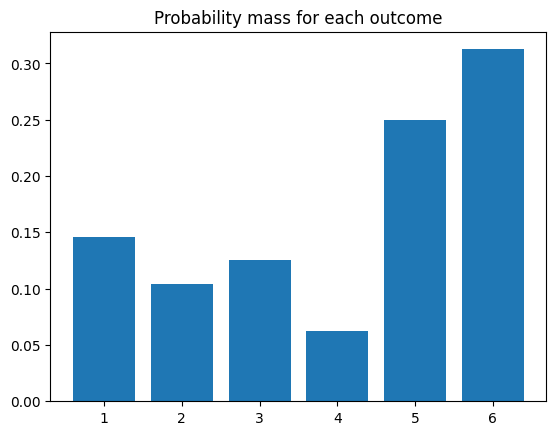

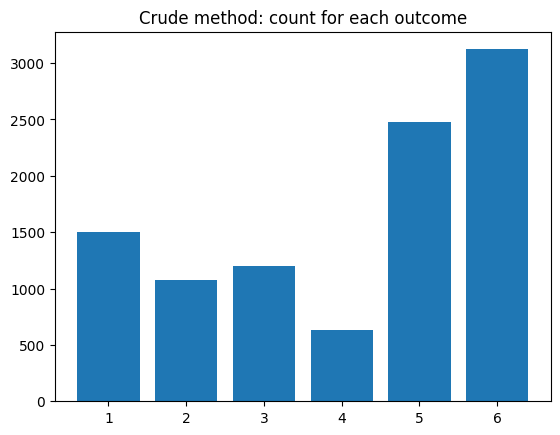

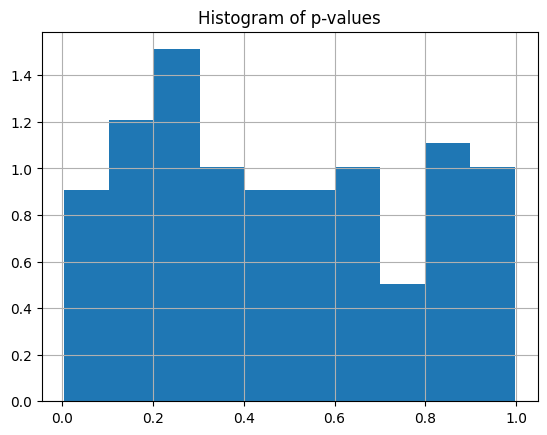

Power_divergenceResult(statistic=6.162605714285733, pvalue=0.29071674023222976)

In [ ]:
p = [7/48, 5/48, 1/8, 1/16, 1/4, 5/16]

def crude(p, size = 10000):
    us = np.random.uniform(0, 1, size)
    cdf = np.cumsum(p)
    k = len(p)
    vals = [k - np.sum(cdf>=u) + 1 for u in us]
    return vals

vals = crude(p)
plt.bar(range(1, 7), p)
plt.title('Probability mass for each outcome')
plt.show()

unique_outcomes = np.arange(1,7)
counts = [np.sum(vals == u) for u in unique_outcomes]
plt.figure()
plt.bar(range(1, 7), counts)
plt.title('Crude method: count for each outcome')
plt.show()

pvals = []
for i in range(100):
    vals = crude(p)
    counts = np.array([np.sum(vals == u) for u in unique_outcomes])
    pvals.append(stats.chisquare(counts, np.array(p)*len(vals))[1])

plt.figure()
plt.hist(pvals, density = True)
plt.grid()
plt.title('Histogram of p-values')
plt.show()

Rejection Method

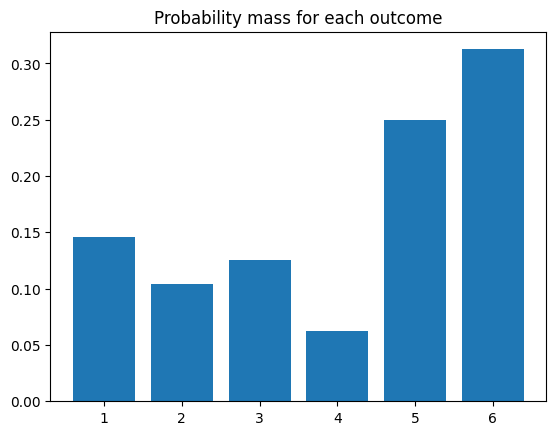

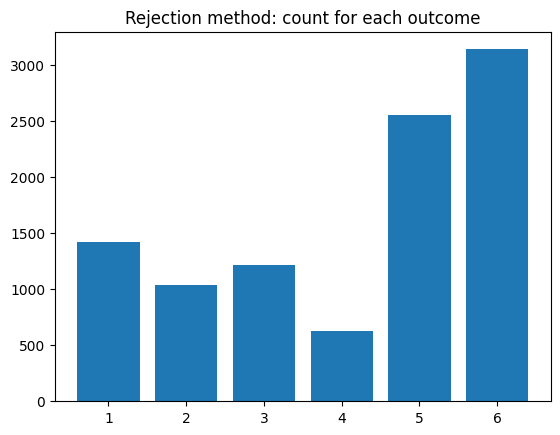

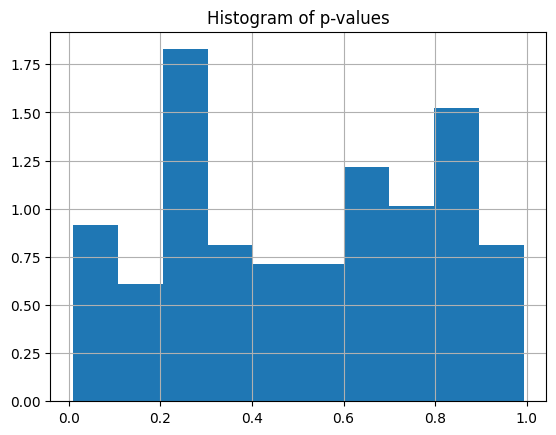

In [ ]:
def rejection(p, size = 10000):
    vals = []
    k = len(p)
    C = 2
    while(len(vals)<size):
        u1, u2 = np.random.uniform(0,1,2)
        I = int(np.floor(k * u1) + 1)
        if u2 <= p[I-1]/C:
            vals.append(I)
    return vals

p = [7/48, 5/48, 1/8, 1/16, 1/4, 5/16]
vals = rejection(p)
plt.bar(range(1, 7), p)
plt.title('Probability mass for each outcome')
plt.show()

unique_outcomes = np.arange(1,7)
counts = [np.sum(vals == u) for u in unique_outcomes]
plt.figure()
plt.bar(range(1, 7), counts)
plt.title('Rejection method: count for each outcome')
plt.show()

pvals = []
for i in range(100):
    vals = rejection(p)
    counts = np.array([np.sum(vals == u) for u in unique_outcomes])
    pvals.append(stats.chisquare(counts, np.array(p)*len(vals))[1])

plt.figure()
plt.hist(pvals, density = True)
plt.grid()
plt.title('Histogram of p-values')
plt.show()

Alias Method

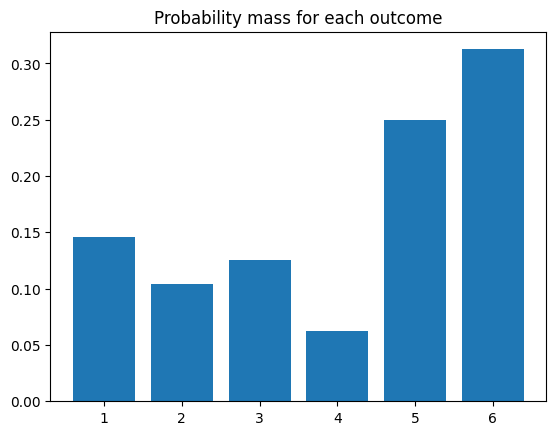

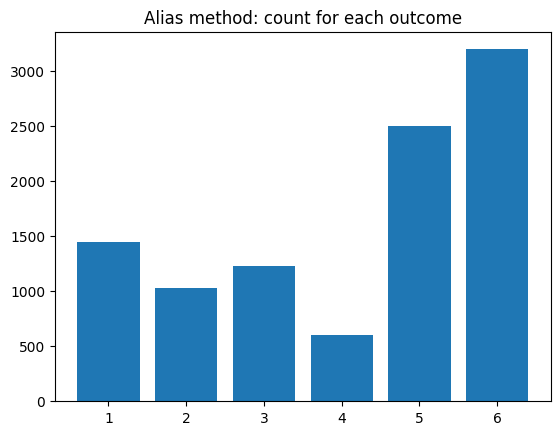

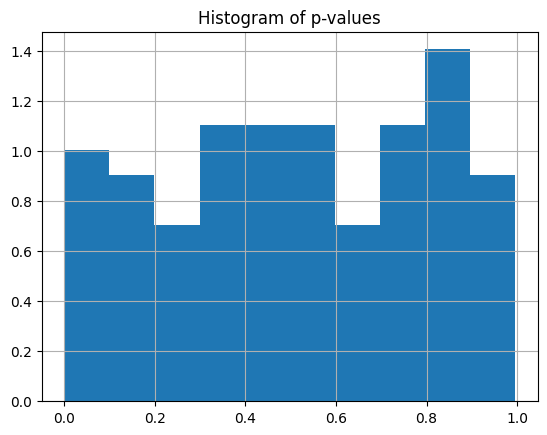

In [ ]:
def alias(p, size = 10000):
    k = len(p)
    L = np.arange(k)
    F = k * np.array(p)
    G = np.where(F>=1)[0]
    S = np.where(F<=1)[0]
    while(S.shape[0]!=0):
        i = G[0]
        j = S[0]
        L[j] = i + 1
        F[i] = F[i] - 1 + F[j]
        if(F[i] < 1 - 1e-7):
            G = G[1:]
            S = np.append(S, i)
        S = S[1:]

    vals = []
    k = len(p)
    
    while(len(vals)<size):
        u1, u2 = np.random.uniform(0,1,2)
        I = int(np.floor(k * u1) + 1)
        if u2 <= F[I-1]:
            vals.append(I)
        else:
            vals.append(L[I-1])
    return vals

p = [7/48, 5/48, 1/8, 1/16, 1/4, 5/16]
vals = alias(p)
plt.bar(range(1, 7), p)
plt.title('Probability mass for each outcome')
plt.show()

unique_outcomes = np.arange(1,7)
counts = [np.sum(vals == u) for u in unique_outcomes]
plt.figure()
plt.bar(range(1, 7), counts)
plt.title('Alias method: count for each outcome')
plt.show()

pvals = []
for i in range(100):
    vals = alias(p)
    counts = np.array([np.sum(vals == u) for u in unique_outcomes])
    pvals.append(stats.chisquare(counts, np.array(p)*len(vals))[1])

plt.figure()
plt.hist(pvals, density = True)
plt.grid()
plt.title('Histogram of p-values')
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Sampling from distributions

Exponential Distribution

We define a utility function to sample from the Exponential Distribution given the parameter lambda.


In [ ]:
def getExp(lam = 1, size = 10000):
    us = np.random.uniform(0,1,size)
    exp = -np.log(us)/lam
    return exp 

Then, we simulated 10000 values using λ = 2 and plotted them using an histogram, along with the
analytical probability density function.

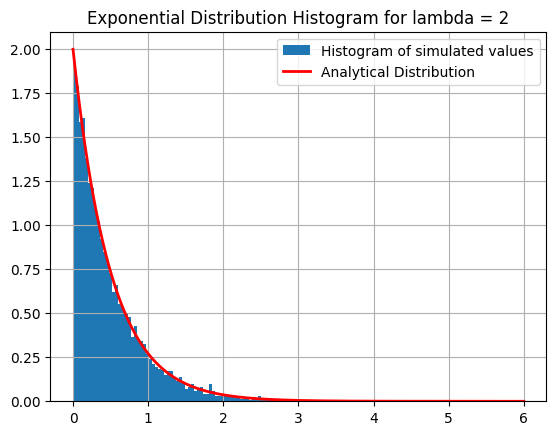

In [ ]:
lam = 2
exp = getExp(lam)
x = np.linspace(0,6, num = 10000)
plt.figure()
plt.hist(exp, bins = 100, density=True, label = 'Histogram of simulated values')
plt.plot(x,lam*np.exp(-lam*x), color = 'red', linewidth = '2', label = 'Analytical Distribution')
plt.plot()
plt.title('Exponential Distribution Histogram for lambda = 2')
plt.legend()
plt.grid()
plt.show()

The visual results are satisfactory, but we also performed tests for distribution type: we used
Kolmogorov Smirnov test to collect a list of p-values that we then plotted using an histogram,
noting how they seem to be uniformly distributed between 0 and 1. This suggests
therefore that our generator indeed samples values from the desired distribution.

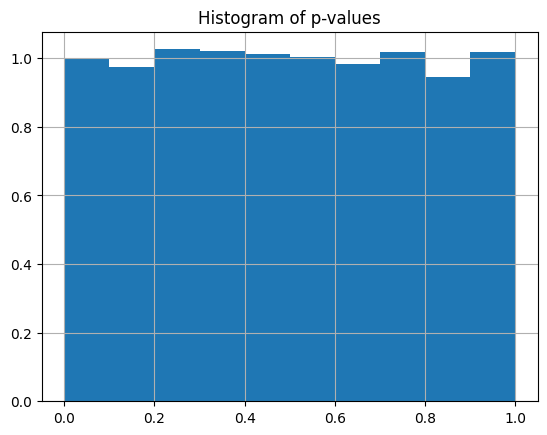

In [ ]:
lam = 2
p = []
for i in range(10000):
    exp = getExp(lam)
    p.append(stats.kstest(exp, cdf = (lambda x: 1 - np.exp(-lam*x)))[1])

plt.figure()
plt.hist(p, density = True)
plt.grid()
plt.title('Histogram of p-values')
plt.show()

Normal Distribution

We define a utility function to sample from the Normal Distribution using the Box Muller method.

In [ ]:
def getNorm(size = 10000):
    u1 = np.random.uniform(0,1,size//2)
    u2 = np.random.uniform(0,1,size//2)
    k = np.sqrt(-2*np.log(u1))
    z1 = k * np.cos(2*np.pi*u2)
    z2 = k * np.sin(2*np.pi*u2)
    z = np.append(z1, z2)
    return z

Again, we sampled 10000 values using the above function and we visually inspected the results
with an histogram.

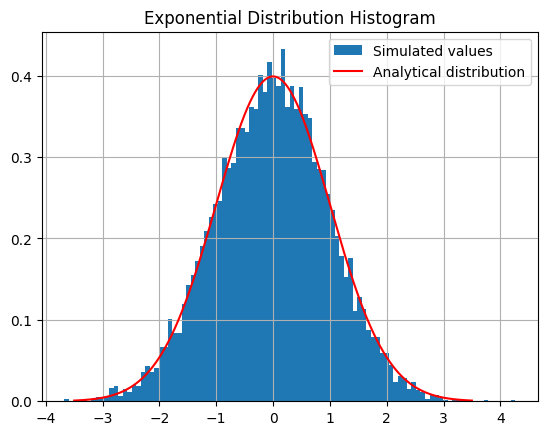

In [ ]:
vals = getNorm()
x = np.linspace(-3.5,3.5, num = 10000)
plt.figure()
plt.hist(vals, bins = 100, density=True, label = 'Simulated values')
plt.plot(x, stats.norm.pdf(x, 0, 1), color = 'red', label = 'Analytical distribution')
plt.plot()
plt.title('Exponential Distribution Histogram')
plt.legend()
plt.grid()
plt.show()

We performed Kolmogorov Smirnov tests to check if our hypothesis (i.e., the sampled values
follow a normal distribution) is respected, generating a set of p-values and seeing that they are
uniformly distributed between 0 and 1: therefore, we can not reject our hypothesis
and we have strong suggestion that indeed we are sampling from the normal distribution.

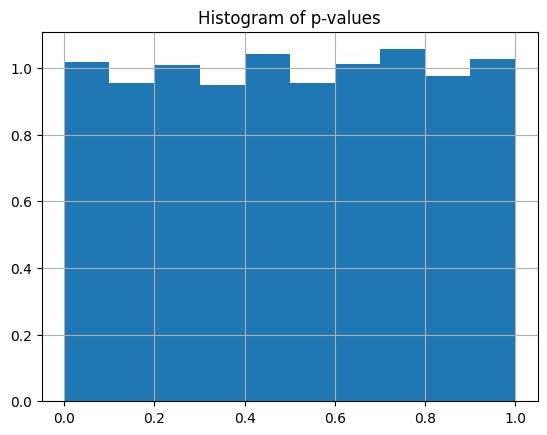

In [ ]:
p = []
for i in range(10000):
    vals = getNorm(lam)
    p.append(stats.kstest(vals, cdf = 'norm')[1])

plt.figure()
plt.hist(p, density = True)
plt.grid()
plt.title('Histogram of p-values')
plt.show()


Pareto

We implemented a function allowing us to generate values from the Pareto distribution, given
the various parameters (with support on [0, ∞[)

In [ ]:
def getPar(k, beta = 1, size = 10000):
    us = np.random.uniform(0, 1, size)
    par = beta*(us**(-1/k)-1)
    return par

We generated simulated values from the above code experimenting with various values of the
first parameter k, as presented in the figure below, along with the real probability density function.

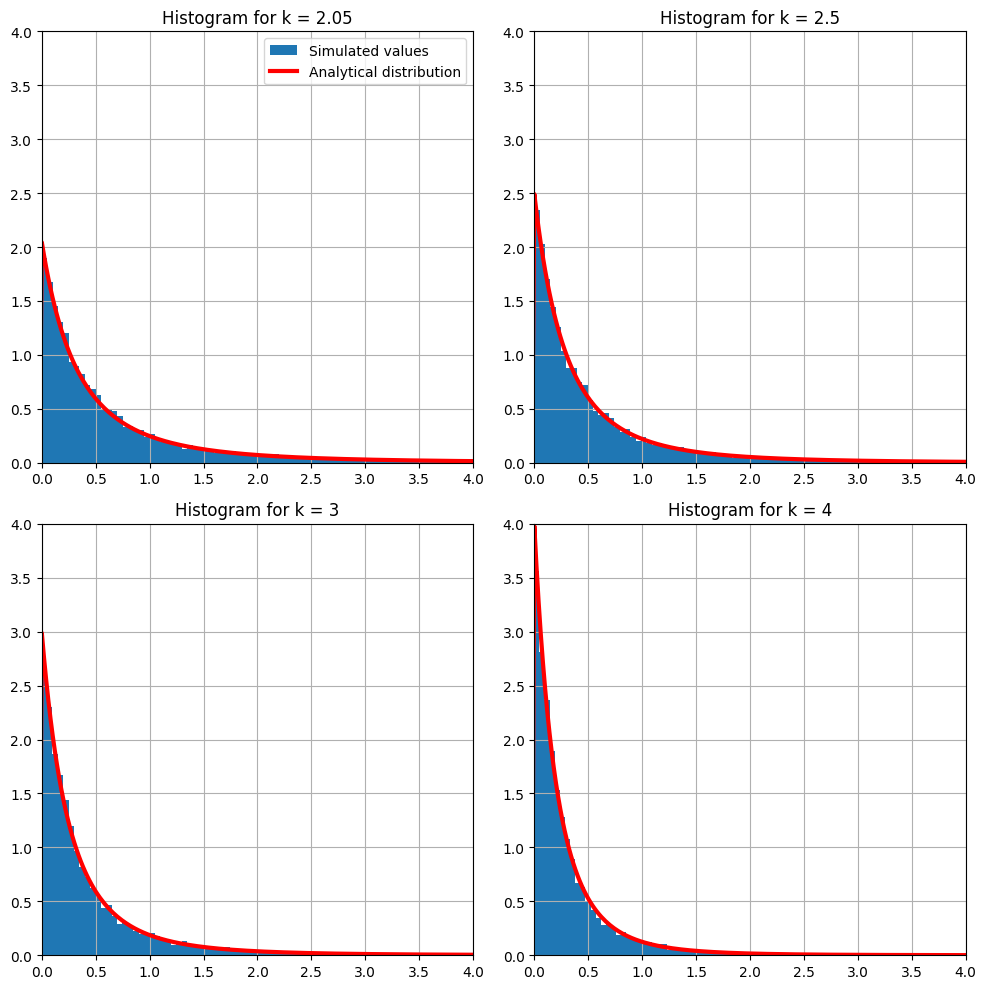

In [ ]:
ks = [2.05, 2.5, 3, 4]

fig, axs = plt.subplots(2,2, figsize = (10,10))
axs = axs.flatten()

for i, k in enumerate(ks):
    vals = getPar(k)
    vals_display = vals[vals<5] #for visualization purposes
    axs[i].hist(vals_display, bins = 100, density = True, label = 'Simulated values')
    x = np.linspace(0,20,1000)
    axs[i].plot(x-1, stats.pareto.pdf(x, k), color = 'red', linewidth = '3', label = 'Analytical distribution')
    axs[i].set_title('Histogram for k = {}'.format(k))
    axs[i].set_xlim([0,4])
    axs[i].set_ylim([0,4])
    axs[i].set_aspect('equal', 'box')
    axs[i].grid()

axs[0].legend()
fig.tight_layout()

As for the exponential and normal distributions, we performed Kolomogorov Smirnov tests on
the sampled values to confirm the hypothesis that they follow correctly the Pareto distribution,
observing how the generated p-values follow the uniform distribution between 0 and 1.

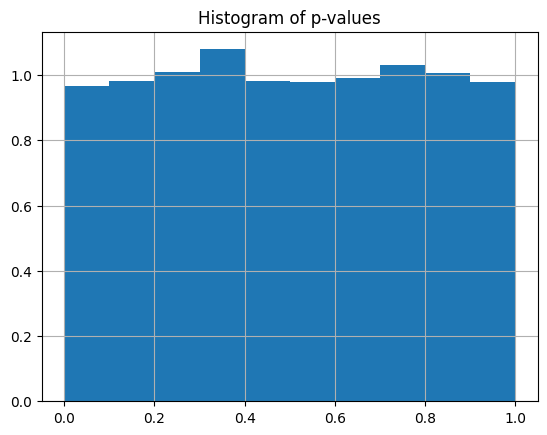

In [ ]:
p = []
for i in range(10000):
    vals = getPar(2.5)
    p.append(stats.kstest(vals, cdf = (lambda x: 1 - (1 + x)**(-2.5)))[1])

plt.figure()
plt.hist(p, density = True)
plt.grid()
plt.title('Histogram of p-values')
plt.show()

# Pareto Distribution: Mean and Variance analysis

The following code was used in order to generate values from the Pareto distribution, playing
around with different values of k (assumed to be greater or equal than 2 to get a valid value for
the analytical variance), which stands for the shape parameter of the distribution. The support
for the sampled values was [β, ∞[ (we set β = 1 in the code). For each k, we computed the
analytical and empirical mean and variance, and printed the results

In [ ]:
ks = np.linspace(2.001, 4, 6)
beta = 1.
size = 100000

for k in ks:
    us = np.random.uniform(0, 1, size)
    vals = beta*(us**(-1/k))
    E = beta * k / (k - 1)
    V = beta**2 * k /(k-1)**2/(k-2)
    sample_E = np.mean(vals)
    sample_V = np.std(vals)**2
    print('-----------------\nk = {:.3f}'.format(k))
    print('analytical mean = {:.4f}'.format(E))
    print('empirical mean = {:.4f}'.format(sample_E))
    print('analytical variance = {:.4f}'.format(V))
    print('empirical variance = {:.4f}'.format(sample_V))


#problem when k approaches 2, the sample variance and the analytical
#variance diverge





-----------------
k = 2.001
analytical mean = 1.9990
empirical mean = 1.9868
analytical variance = 1997.0040
empirical variance = 7.0416
-----------------
k = 2.401
analytical mean = 1.7139
empirical mean = 1.7089
analytical variance = 3.0526
empirical variance = 1.9338
-----------------
k = 2.801
analytical mean = 1.5554
empirical mean = 1.5509
analytical variance = 1.0789
empirical variance = 0.9723
-----------------
k = 3.200
analytical mean = 1.4545
empirical mean = 1.4543
analytical variance = 0.5506
empirical variance = 0.5024
-----------------
k = 3.600
analytical mean = 1.3846
empirical mean = 1.3852
analytical variance = 0.3328
empirical variance = 0.3308
-----------------
k = 4.000
analytical mean = 1.3333
empirical mean = 1.3329
analytical variance = 0.2222
empirical variance = 0.2293


During the experiments with k > 2, we noted some problems with the estimation of the variance, while the
estimation of the mean has been proven accurate and stable, given a reasonably large sample
size. More in detail, we noticed how for values of k approaching to 2, the analytical variance
becomes larger and larger, going to infinity at limit. This behavior is not captured by the
empirical value, which is limited by the sample size, thus providing an underestimation
of the true variance. Having larger sample size could help in estimating more accurately the
parameters, but always being aware that for extreme values of k the results might be wrong, since we might need an enormuous amount of samples.

The same reasoning could be applied when we let k be close to 1 and comparing empirical
mean and the analytical mean. Note that, in this case, the analytical variance is not defined

These results are due to the shape of the Pareto Distribution, which has a long right tail.

# Confidence intervals for the Normal Distribution

We generated one hundred Confidence Intervals with confidence level equal to 95%, each one
based on ten observations from the normal distribution.

In [ ]:
from scipy.stats import t
n = 10
ci = np.zeros((100,4))
CL = 0.95 # confidence level
DF = n-1 # degrees of freedom
z = np.abs(t.ppf((1-CL)/2,DF ) )
for i in range(100):
    u1 = np.random.rand(n)
    u2 = np.random.rand(n)
    x1 = np.sqrt(-2*np.log(u1) ) * np.cos(2*np.pi*u2)
    m = np.mean(x1) 
    s = np.std(x1)
    pm = z * s/np.sqrt(n)
    ci[i,:] = [m+pm, m-pm,m,s]


We print some interesting results for the run

In [ ]:
# compute how many confidence intervals do not contain the true mean
not_covered = np.sum(np.logical_or(ci[:100,0] < 0, ci[:100,1] > 0))
print('Number of Confidence intervals that cover the true parameter: ', not_covered)
      
# compute the average width of the confidence interval
avg_width = np.mean(np.array(ci[:100,0]-np.array(ci[:100,1])))
print('average width of the confidence intervals: ', avg_width)

Number of Confidence intervals that cover the true parameter:  8
average width of the confidence intervals:  1.3081657623393435


The generated Confidence Intervals are then plotted to get a visual result

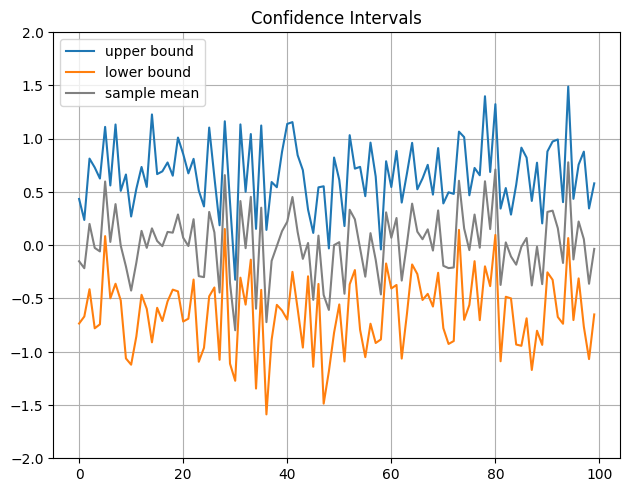

In [ ]:
plt.plot(ci[:100,0], label = 'upper bound')
plt.plot(ci[:100,1], label = 'lower bound')
plt.plot(ci[:100,2],color="gray", label = 'sample mean')
plt.grid()
plt.legend()
plt.tight_layout()
plt.title('Confidence Intervals')
plt.ylim(-2,2)
plt.show()

Given the confidence level, we expect that 95 out of the 100 generated confidence intervals
capture the true mean of the standard normal distribution, i.e. the interval contains the value
0. This fact is respected by our experiments, even if we observed some variability in
the results, as one could expect by observing that each confidence interval is based only on
ten generated observations. This uncertainty is also highlighted by the average width of the
confidence intervals: trying to have a larger sample size, we observed more robust results with less variability and much thinner confidence
intervals

# Pareto Distribution using Composition

The following code is able to generate simulated values from the Pareto Distribution
using composition, as presented in the lecture slides. The results are then plotted noting that using composition we have simulated the Pareto
distribution with parameters β = 1 and k = 1.

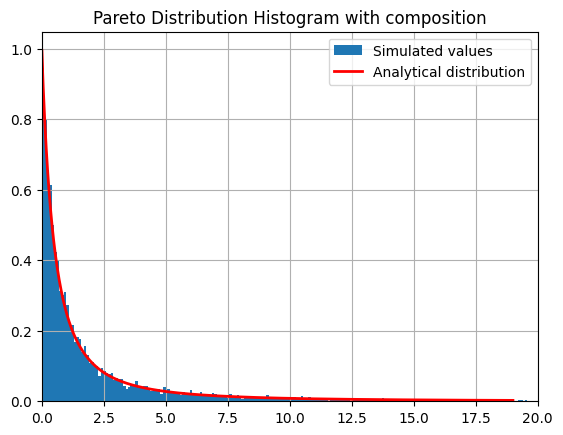

In [ ]:
mu = 1.
vals = []
for i in range(10000):
    u1= np.random.uniform(0,1)
    y = -np.log(u1)/mu
    u2 = np.random.uniform(0,1)
    vals.append(-np.log(u2)/y)

vals = np.array(vals)
vals = vals[vals < 20]
x = np.linspace(0,20,1000)
plt.hist(vals, bins = 200, density = True, label = 'Simulated values')
plt.xlim([0,20])
plt.plot(x-1, stats.pareto.pdf(x, 1), color = 'red', linewidth = '2', label = 'Analytical distribution')
plt.legend()
plt.grid()
plt.title('Pareto Distribution Histogram with composition')
plt.show()


In [ ]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

QUESTION 1

In [ ]:
nserver = 10
mean_st = 8
mean_tbc = 1
customers = 10000
nsim = 10

In [ ]:
def getHyperExp(p, lam1, lam2, size = 10000):
    res = np.zeros(size)
    u = np.random.uniform(0,1, size = size)
    res[u <= p] = stats.expon.rvs(scale = 1/lam1, size = np.sum(u <= p))
    res[u > p] = stats.expon.rvs(scale = 1/lam2, size = np.sum(u > p))
    return res

def getPar(k, beta = 1, size = 10000):
    us = np.random.uniform(0, 1, size)
    par = beta*(us**(-1/k))
    return par

In [ ]:
def getCI(runs):
    CL = 0.95 # confidence level
    DF = nsim-1 # degrees of freedom
    z = np.abs(stats.t.ppf((1-CL)/2,DF))
    mean = np.mean(runs)
    std = np.std(runs, ddof = 1)
    u = mean + z*std/np.sqrt(nsim)
    l = mean - z*std/np.sqrt(nsim)
    return mean, u, l

In [ ]:
def simulate_queue_q1(nserver, customers, mean_st, mean_tbc):
    server_time = np.zeros(nserver)
    busy = []
    time = 0
    blocked = 0
    for _ in range(customers):
        delta_arrival_time = stats.expon.rvs(scale = mean_tbc, size = 1)
        time += delta_arrival_time
        min_server = np.min(server_time)
        idx_min_server = np.argmin(server_time)
        if time < min_server:
            blocked +=1
            busy.append(nserver)
        else:
            server_time[idx_min_server] = time + stats.expon.rvs(scale = mean_st, size = 1)
            busy.append(np.sum(server_time > time))
            
    
    return blocked/customers, busy

(0.12332000000000001, 0.1285268723342641, 0.11811312766573592)


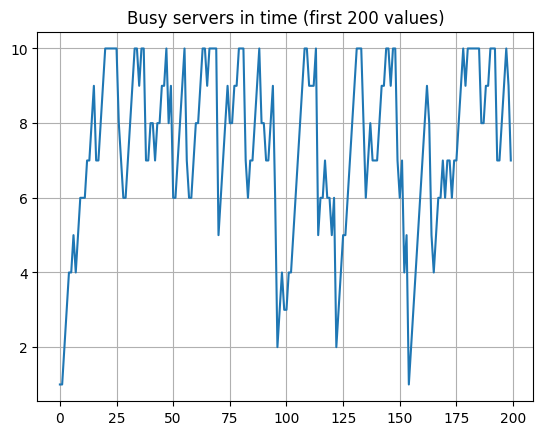

In [ ]:
runs = []
for i in range(nsim):
    blocked, _ = simulate_queue_q1(nserver, customers, mean_st, mean_tbc)
    runs.append(blocked)
print(getCI(runs))

_, b = simulate_queue_q1(nserver, customers, mean_st, mean_tbc)
plt.plot(b[:200])
plt.title('Busy servers in time (first 200 values)')
plt.grid()
plt.show()

In [ ]:
A = mean_st*(1/mean_tbc)
den = np.sum([A**i/np.math.factorial(i) for i in range(nserver+1)])
exact = A**nserver/np.math.factorial(nserver)/den
print('Exact Solution: {:.2f}% of customers will be blocked'.format(exact*100))

Exact Solution: 12.17% of customers will be blocked


QUESTION 2

In [ ]:
def simulate_queue_q2(nserver, customers, mean_st, mean_tbc, type = 'Erl'):
    server_time = np.zeros(nserver)
    time = 0
    blocked = 0
    for _ in range(customers):
        if type == 'Erl':
            #erlang with some parameters such that the mean is equal to 1
            delta_arrival_time = stats.erlang.rvs(a = 3, scale = mean_tbc/3, size = 1)
        elif type == 'Hyp':
            delta_arrival_time = getHyperExp(0.8, 0.8333, 5, size = 1)[0]
        time += delta_arrival_time
        min_server = np.min(server_time)
        idx_min_server = np.argmin(server_time)
        if time < min_server:
            blocked +=1
        else:
            server_time[idx_min_server] = time + stats.expon.rvs(scale = mean_st, size = 1)[0]
    
    return blocked/customers

In [ ]:
#ERLANG
runs = []
for i in range(nsim):
    blocked = simulate_queue_q2(nserver, customers, mean_st, mean_tbc, 'Erl')
    runs.append(blocked)

print(getCI(runs))

#HYPER EXPONENTIAL
runs = []
for i in range(nsim):
    blocked = simulate_queue_q2(nserver, customers, mean_st, mean_tbc, 'Hyp')
    runs.append(blocked)

print(getCI(runs))

(0.08352000000000001, 0.08639526414590964, 0.08064473585409038)
(0.139, 0.142921942379356, 0.13507805762064404)


QUESTION 3

In [ ]:
def simulate_queue_q3(nserver, customers, mean_st, mean_tbc, type = 'Const'):
    server_time = np.zeros(nserver)
    time = 0
    blocked = 0
    for _ in range(customers):
        delta_arrival_time = stats.expon.rvs(scale = mean_tbc, size = 1)
        time += delta_arrival_time
        min_server = np.min(server_time)
        idx_min_server = np.argmin(server_time)
        if time < min_server:
            blocked +=1
        else:
            if(type == 'Const'):
                server_time[idx_min_server] = time + mean_st
            elif(type == 'Par1'):
                server_time[idx_min_server] = time + stats.pareto.rvs(b = 1.05, scale = mean_st*(1.05-1)/1.05, size = 1)
            elif(type == 'Par2'):
                server_time[idx_min_server] = time + stats.pareto.rvs(b = 2.05, scale = mean_st*(2.05-1)/2.05, size = 1)
            elif(type == 'Erl'):
                #erlang with some parameters such that the mean is equal to 8
                server_time[idx_min_server] = time + stats.erlang.rvs(a = 2, scale = mean_st/2, size = 1)

    return blocked/customers

In [ ]:
np.mean(stats.pareto.rvs(b = 2.05, scale = mean_st*(2.05-1)/2.05, size = 100000))

8.026465532268913

In [ ]:
#CONSTANT
runs = []
for i in range(nsim):
    blocked = simulate_queue_q3(nserver, customers, mean_st, mean_tbc, 'Const')
    runs.append(blocked)

print(getCI(runs))

#PARETO with k = 1.05
runs = []
for i in range(nsim):
    blocked = simulate_queue_q3(nserver, customers, mean_st, mean_tbc, 'Par1')
    runs.append(blocked)

print(getCI(runs))

#PARETO with k = 2.05
runs = []
for i in range(nsim):
    blocked = simulate_queue_q3(nserver, customers, mean_st, mean_tbc, 'Par2')
    runs.append(blocked)

print(getCI(runs))

#ERLANG
runs = []
for i in range(nsim):
    blocked = simulate_queue_q3(nserver, customers, mean_st, mean_tbc, 'Erl')
    runs.append(blocked)

print(getCI(runs))

(0.12353, 0.12729453432972074, 0.11976546567027928)
(0.0018599999999999999, 0.0036380932641118706, 8.190673588812938e-05)
(0.12547000000000003, 0.13627139183481968, 0.11466860816518037)
(0.12006000000000001, 0.12339274094865095, 0.11672725905134908)


In [ ]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

We define a function to generate a confidence interval given a vector of sampled values

In [ ]:
def getCI(vals):
    n = len(vals)
    CL = 0.95 # confidence level
    DF = n-1 # degrees of freedom
    z = np.abs(stats.t.ppf((1-CL)/2,DF))
    mean = np.mean(vals)
    std = np.std(vals, ddof = 1)
    u = mean + z*std/np.sqrt(n)
    l = mean - z*std/np.sqrt(n)
    return mean, l, u

# Question 1 - crude method

We sample 100 values from the uniform distribution and apply the crude method to get the estimate of the integral.

In [ ]:
us = np.random.uniform(0,1, size = 100)
exp = np.exp(us)
print('The variance of the estimation is: {:.4f}'.format(np.var(exp)))
mean, l, u = getCI(exp)
print('The estimate of the integral is: {:.4f}'.format(mean))
print('With the following confidence interval: {:.4f}, {:.4f}'.format(l,u))

The variance of the estimation is: 0.2421
The estimate of the integral is: 1.7572
With the following confidence interval: 1.6590, 1.8553


# Question 2  - antithetic variables

We sample 100 values from the uniform distribution and we estimate the integral using antithetic variables

In [ ]:
us = np.random.uniform(0,1, size = 100)
exp = np.exp(us)
y = (exp + np.e/exp)/2

print('The variance of the estimation is: {:.4f}'.format(np.var(y)))
mean, l, u = getCI(y)
print('The estimate of the integral is: {:.4f}'.format(mean))
print('With the following confidence interval: {:.4f}, {:.4f}'.format(l,u))

The variance of the estimation is: 0.0042
The estimate of the integral is: 1.7154
With the following confidence interval: 1.7024, 1.7283


Note that the variance is reduced a lot with respect to the crude method

# Question 3 - control variates

In [ ]:
us = np.random.uniform(0,1, size = 100)
exp = np.exp(us)
c = -np.cov(exp, us)[0,1]/np.var(us)
z = exp + c*(us - 1/2)
print('The variance of the estimation is: {:.4f}'.format(np.var(z)))
mean, l, u = getCI(z)
print('The estimate of the integral is: {:.4f}'.format(mean))
print('With the following confidence interval: {:.4f}, {:.4f}'.format(l,u))

The variance of the estimation is: 0.0039
The estimate of the integral is: 1.7220
With the following confidence interval: 1.7096, 1.7344


Also in this case the variance is reduced with respect the crude method

# Question 4 - stratified sampling

We use stratified sampling with 10 strata to get the estimate of the integral.

In [ ]:
w = [] # The final list will contain ten values for the estimation of the integral
for i in range(10):
    us = np.random.uniform(0,1,10) # Each sample is based on ten uniformly distributed values
    w.append(np.sum([np.exp((j + us[j])/10) for j in range(10)])/10) # Stratified sampling

print('The variance of the estimation is: {:.4f}'.format(np.var(w)))
mean, l, u = getCI(w)
print('The estimate of the integral is: {:.4f}'.format(mean))
print('With the following confidence interval: {:.4f}, {:.4f}'.format(l,u))

The variance of the estimation is: 0.0003
The estimate of the integral is: 1.7147
With the following confidence interval: 1.7026, 1.7268


# Question 5 - control variates for the queueing problem in Ex4

control variate is the mean arrival time for the run

In [ ]:
def simulate_queue(nserver, customers, mean_st, mean_tbc):
    server_time = np.zeros(nserver)
    time = 0
    blocked = 0
    t_arrival_time = 0
    for _ in range(customers):
        delta_arrival_time = stats.expon.rvs(scale = mean_tbc, size = 1)[0]
        t_arrival_time += delta_arrival_time
        time += delta_arrival_time
        min_server = np.min(server_time)
        idx_min_server = np.argmin(server_time)
        if time < min_server:
            blocked +=1
        else:
            delta_service_time = stats.expon.rvs(scale = mean_st, size = 1)
            server_time[idx_min_server] = time + delta_service_time
    
    return blocked/customers, t_arrival_time/customers

In [ ]:
nserver = 10
mean_st = 8
mean_tbc = 1
customers = 10000
nsim = 10
runs = []
arrivals = []
for i in range(nsim):
    blocked, arrival = simulate_queue(nserver, customers, mean_st, mean_tbc)
    runs.append(blocked)
    arrivals.append(arrival)

runs = np.array(runs)
arrivals = np.array(arrivals)
c = -np.cov(runs, arrivals)[0,1]/np.var(arrivals)
z = runs + c*(arrivals - mean_tbc)
print(getCI(z))
print(getCI(runs))
print(np.cov(runs), np.cov(z))

(0.11989798911541467, 0.12168346526458784, 0.1181125129662415)
(0.11982000000000001, 0.12178887107092433, 0.11785112892907569)
7.575111111111105e-06 6.229634374080824e-06


The variance is indeed reduced

# q6 - common random numbers

In [ ]:
def getExp(lam, us):
    exp = -np.log(us)/lam
    return exp 

def getHyperExp(p, lam1, lam2, u1, u2):
    res = np.zeros(len(u1))
    res[u2 <= p] = getExp(lam = lam1, us = u1[u2 <=p])
    res[u2 > p] = getExp(lam = lam2, us = u1[u2 > p])
    return res

def simulate_queue_q2(nserver, customers, mean_st, mean_tbc, type = 'Exp', seed = 0):
    np.random.seed(seed)
    u1 = np.random.uniform(0,1, customers)
    u2 = np.random.uniform(0,1, customers)
    server_time = np.zeros(nserver)
    time = 0
    blocked = 0
    if type == 'Exp':
        arrival_times = getExp(lam = mean_tbc, us = u1)
    elif type == 'Hyp':
        arrival_times = getHyperExp(0.8, 0.8333, 5, u1, u2)
    for i in range(customers):
        delta_arrival_time = arrival_times[i]
        time += delta_arrival_time
        min_server = np.min(server_time)
        idx_min_server = np.argmin(server_time)
        if time < min_server:
            blocked += 1
        else:
            server_time[idx_min_server] = time + stats.expon.rvs(scale = mean_st, size = 1)
    
    return blocked/customers

nserver = 10
mean_st = 8
mean_tbc = 1
customers = 10000
nsim = 10
runs = []
for i in range(10):
    runs.append([simulate_queue_q2(nserver, customers, mean_st, mean_tbc, 'Hyp', i), simulate_queue_q2(nserver, customers, mean_st, mean_tbc, 'Exp', i)])

runs = np.array(runs)
stats.ttest_rel(runs[:,0], runs[:,1]), np.mean(runs[:,0] - runs[:,1])*np.sqrt(10)/np.std(runs[:,0] - runs[:,1], ddof = 1)

(Ttest_relResult(statistic=16.68412262034125, pvalue=4.462657602263569e-08),
 16.684122620341252)

# q7 - montecarlo on standard normal random variable

Crude method

In [ ]:
a = 2
tot = 1000000
values = np.random.randn(tot) > a
res = np.mean(values)
print(getCI(values))
print(res, 1 - stats.norm.cdf(a))

(0.022609, 0.02290035580710304, 0.02231764419289696)
0.022609 0.02275013194817921


Importance sampling

importance sampling reduces the amount of samples required to estimate the probability

In [ ]:
a = 2
s = 1
tot = 10000

samples = stats.norm.rvs(loc = a, scale = s, size = tot)

h = samples > a
f = stats.norm.pdf(samples)
g = stats.norm.pdf(samples, loc = a, scale = s)

Z = h * f / g
res = np.mean(Z)

#print(getCI(Z))
print(res, 1 - stats.norm.cdf(a))

0.022382897015648693 0.02275013194817921


# q8 - exponential importance sampling

In [ ]:
lam = 1.35483
size = 100000
values = stats.expon.rvs(scale = 1/lam, size = size)
f = np.logical_and(values <= 1, values>=0)
h = np.exp(values)
g = lam*np.exp(-lam*values)

res = f * h / g
np.var(res), np.mean(res)

# equal to the analytical solution (see photos on phone, done on paper)


(3.135220056680228, 1.7224825530121732)

# q9 - pareto

In [ ]:
k = 1.05
size = 10000
values = stats.pareto.rvs(k-1, size = size)

h = values
f = stats.pareto.pdf(values, k)
g = stats.pareto.pdf(values, k-1)

res = h * f / g
np.mean(res), k/(k-1)

(21.000000000000075, 20.999999999999982)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Question 1 - Truncated Poisson

The following function evaluates the unnormalized distribution:

In [ ]:
def g(A, i):
    return A**i/np.math.factorial(i)

We also define a function able to compute the true probability distribution for the truncated Poisson, to be compared with the results of the Metropolis Hastings algorithm.

In [ ]:
def poisson():
    n = 10
    A = 8
    d = np.empty(n+1)
    for j in range(n+1):
        d[j] = g(A,j)
    return d/np.sum(d)

The Metropolis Hastings algorithm is implemented by the following function:

In [ ]:
def metropolis_hastings(init = 0, size = 10000):
    A = 8
    m = 10
    res = [init] # res contains the final sampled values
    n = 1
    x = init
    while n < size:
        
        # sampling the new proposal
        delta = np.random.randint(-m,m+1)
        y = np.mod(x + delta, m+1)
        gy = g(A, y)
        gx = g(A, x)

        #acceptance or rejection of the proposal
        if gy >= gx:
            res.append(y)
            x = y
        else:
            p = np.random.rand(1)
            if (p < gy/gx):
                res.append(y)
                x = y
            else:
                res.append(x)
        n += 1
    return res

For visual purposes, we plot the histogram of the sampled values, along with the true probability distribution.

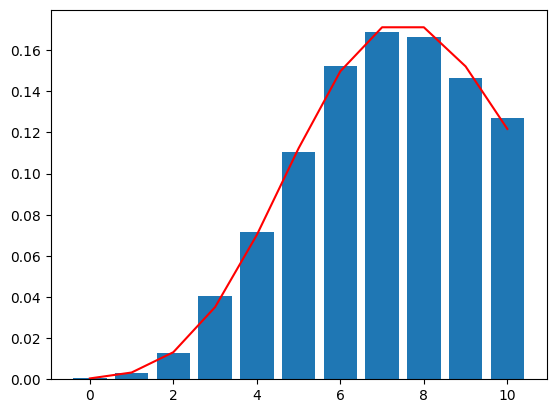

In [ ]:
vals = metropolis_hastings()
unique = np.unique(vals)
counts = np.empty(11)
for i,u in enumerate(unique):
    counts[i] = np.sum(vals == u)

plt.bar(range(11), counts/len(vals))
plt.plot(poisson(), color = 'Red')
plt.show()

From the plot, it seems we achieved the desired result, but we also performed a set of χ2 tests. Then, we plot the histogram of the found p-values. Note that at each iteration, when sampling new values, we save only every four samples to reduce the dependence of one sample with the others, otherwise we would not satisfy the assumptions of the χ2 test. 

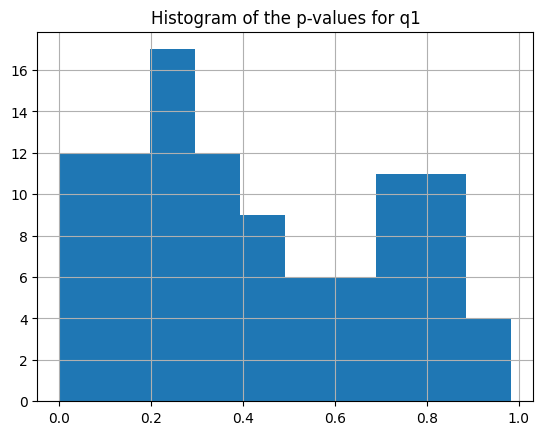

In [ ]:
p_values = []
for i in range(100):
    vals = metropolis_hastings()[::4] # the values are dependent with each other
    unique = np.unique(vals)
    counts = np.empty(11)
    for i,u in enumerate(unique):
        counts[i] = np.sum(vals == u)
    p_values.append(stats.chisquare(counts, poisson()*len(vals))[1])

plt.hist(p_values)
plt.title('Histogram of the p-values for q1')
plt.grid()
plt.show()

The distribution of the p-values is somewhat uniform (there is still a little dependence between the samples). Overall, we can conclude that our implementation of the algorithm is satisfactory and gives the desired results

# Question 2a - Metropolis Hastings in 2D

We define a utility function able to display the results given by our implementations of the algorithms, along with the true distribution for comparison.

In [ ]:
def show_comparison2D(estimated, true_frequency):
    counts = np.empty((11,11))
    for i in range(11):
        for j in range(11):
            counts[i,j] = np.sum(np.logical_and(estimated[:,0]==i, estimated[:,1]==j))
            
    fig, axs = plt.subplots(1,2, figsize = (12,12))
    axs[0].imshow(counts, cmap = 'gray')
    axs[0].set_title('Estimated Frequency')
    axs[1].imshow(true_frequency, cmap = 'gray')
    axs[1].set_title('True Frequency')
    plt.show()

The following function evaluates the unnormalized distribution:

In [ ]:
def g_2D(A1, A2, i, j):
    return A1**i/np.math.factorial(i)*A2**j/np.math.factorial(j)

We also need to have the true values of the distribution when comparing the results of the asked algorithms:

In [ ]:
def poisson2D():
    res = np.zeros((11,11))
    for i in range(11):
        for j in range(0, 11 - i):
            res[i,j] = g_2D(4,4,i,j)
    return res/np.sum(res)

For question 2a, we implement the proposal distribution as a function able to generate new states uniformly. In other words, the output of the function is a pair [i, j] where 0 <= i + j <= 10. There are therefore 66 possible states.

In [ ]:
possible_states = [[i, j] for i in range(11) for j in range(11 - i)]

def getNewIJ():
    idx = int(np.floor(np.random.uniform(0,1)*66))
    return possible_states[idx]

The algorithm is implemented as follows

In [ ]:
def metropolis_hastings2D(init = [0,0], size = 100000):
    A1 = 4
    A2 = 4
    m = 10

    res = np.empty((size,2))
    n = 1
    res[0,:] = init
    i = init[0]
    j = init[1]

    while n < size:
        
        #sampling a new proposal
        new_i, new_j = getNewIJ()

        #acceptance or rejection of the proposal
        gy = g_2D(A1, A2, new_i, new_j)
        gx = g_2D(A1, A2, i, j)
        if gy >= gx:
            res[n,:] = [new_i, new_j]
            i = new_i
            j = new_j
        else:
            p = np.random.rand(1)
            if (p <= gy/gx):
                res[n,:] = [new_i, new_j]
                i = new_i
                j = new_j
            else:
                res[n,:] = [i,j]
        n += 1
    return res

We visualize the results given by the algorithm to see if they are similar to the true distribution

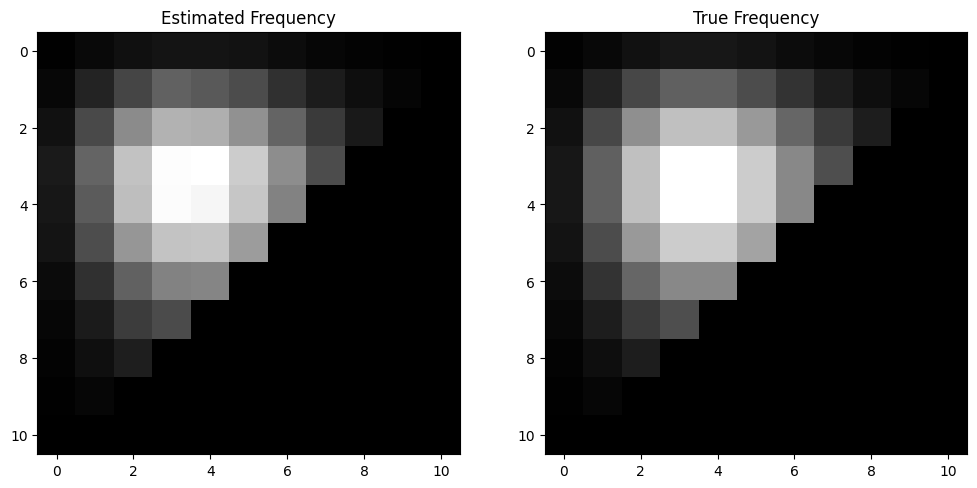

In [ ]:
vals = metropolis_hastings2D()
show_comparison2D(vals, poisson2D()*vals.shape[0])

We also perform χ2 tests to see if the p-values are uniformly distributed between 0 and 1. We keep one sample every four to reduce the dependence between the values.

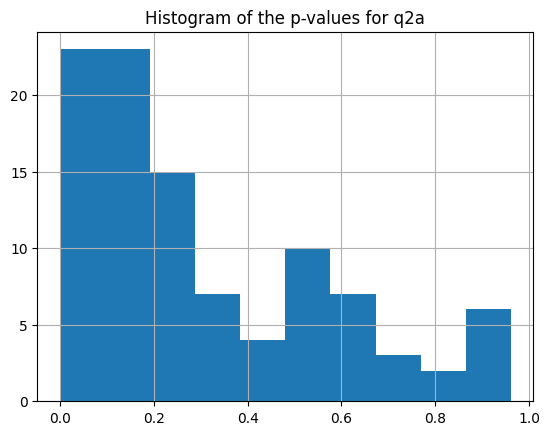

In [ ]:
true_f = poisson2D()
mask = true_f !=0
p_values = []
for i in range(100):
    vals = metropolis_hastings2D()[::4] # the values are dependent with each other
    counts = np.empty((11,11))
    for i in range(11):
        for j in range(11):
            counts[i,j] = np.sum(np.logical_and(vals[:,0]==i, vals[:,1]==j))
    true_f = poisson2D()*vals.shape[0]
    p_values.append(stats.chisquare(counts[mask].flatten(), true_f[mask].flatten())[1])
plt.hist(p_values)
plt.title('Histogram of the p-values for q2a')
plt.grid()
plt.show()

There is still probably some dependence between the samples since the p-values are not perfectly uniformly distributed, and some techniques to reduce it even more could be applied, but we can say that the implementation gives the desired results.

# Question 2b - Metropolis Hastings in 2D - Coordinate Wise

The implementation of the algorithm is very similar the Question 2a, but differs in the sampling of the new state proposal: at each iteration, we fix one direction and we move randomly along the other, generating a new proposal state that will be accepted or rejected.

In [ ]:
def metropolis_hastings2D_coord(init = [0,0], size = 10000):
    A1 = 4
    A2 = 4
    m = 10

    res = np.empty((size,2))
    n = 1
    res[0,:] = init
    i = init[0]
    j = init[1]

    direction = True
    while n < size:

        # sampling a new proposal        
        if direction == True:
            new_i = np.random.randint(0, m - j + 1)
            new_j = j
        else:
            new_i = i
            new_j = np.random.randint(0, m - i + 1)
        direction = not direction

        # acceptance or rejection of the new proposal
        gy = g_2D(A1, A2, new_i, new_j)
        gx = g_2D(A1, A2, i, j)
        if gy >= gx:
            res[n,:] = [new_i, new_j]
            i = new_i
            j = new_j
        else:
            p = np.random.rand(1)
            if (p < gy/gx):
                res[n,:] = [new_i, new_j]
                i = new_i
                j = new_j
            else:
                res[n,:] = [i,j]
        n += 1

    return res

As before we visualize the results for a run to check if the results are what we expect

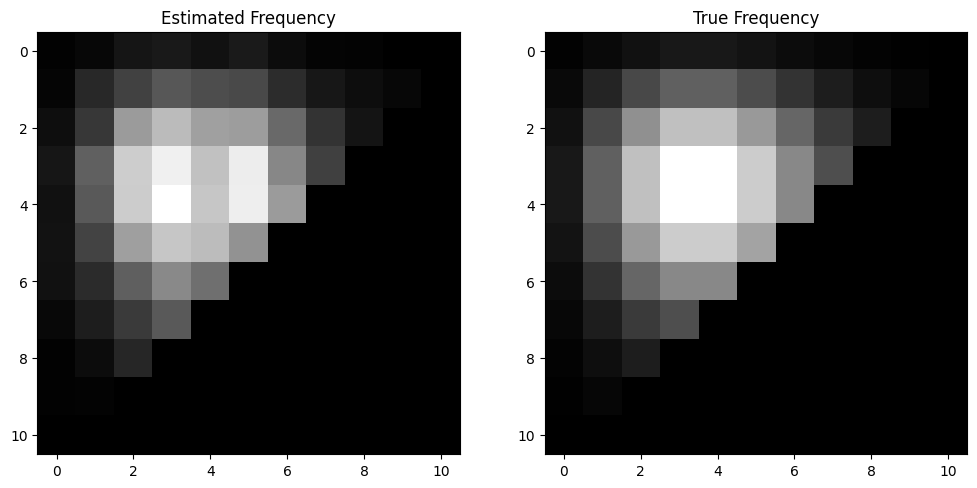

In [ ]:
vals = metropolis_hastings2D_coord()
show_comparison2D(vals, poisson2D()*vals.shape[0])

We perform the usual set of tests to check if the samples indeed come from the desired distribution.

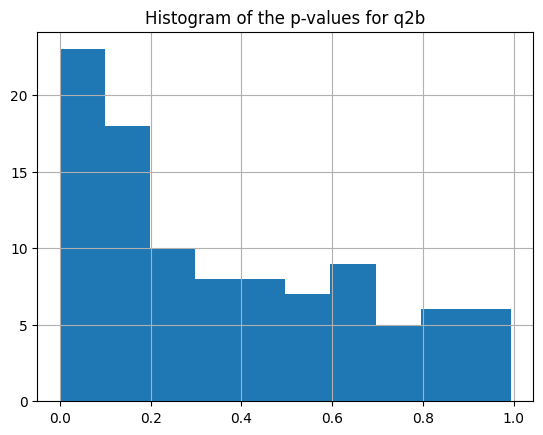

In [ ]:
true_f = poisson2D()
mask = true_f !=0

p_values = []
for i in range(100):
    vals = metropolis_hastings2D_coord()[::4] # the values are dependent with each other
    counts = np.empty((11,11))
    for i in range(11):
        for j in range(11):
            counts[i,j] = np.sum(np.logical_and(vals[:,0]==i, vals[:,1]==j))
    true_f = poisson2D()*vals.shape[0]
    p_values.append(stats.chisquare(counts[mask].flatten(), true_f[mask].flatten())[1])

plt.hist(p_values)
plt.title('Histogram of the p-values for q2b')
plt.grid()
plt.show()

# Question 2c - Gibbs sampling coordinate wise

The following function outputs a vector of probabilities. This probability masses represents the conditional probability of i given j when sampling new states in the Gibbs algorithm. Since the distribution is symmetric the probability distribution of j given i is the same of the previous one, so we do not distinguish between the two cases.

In [ ]:
def condProb(z):
    probs = poisson2D()
    s = np.sum(probs[z,:])
    p = np.zeros(11)
    for k in range(len(p)):
        p[k] = probs[z,k]/s
    return p

The algorithm with Gibbs sampling is implemented as follows. When sampling the new states, first we move in one direction fixing the other (using the conditional probability defined above) and then we move in the other direction, again using the conditional probability.

In [ ]:
def metropolis_hastings2D_gibbs(init = [0,0], size = 10000):
    A1 = 4
    A2 = 4
    m = 10

    res = np.empty((size,2))
    n = 1
    res[0,:] = init
    i = init[0]
    j = init[1]
    while n < size:
        p = condProb(j)
        new_i = np.random.choice(np.arange(11), p = p)
        p = condProb(int(new_i))
        new_j = np.random.choice(np.arange(11), p = p)

        res[n, :] = [new_i, new_j] #saving the new state
        i = new_i
        j = new_j

        n += 1
    return res

We visually inspect the results

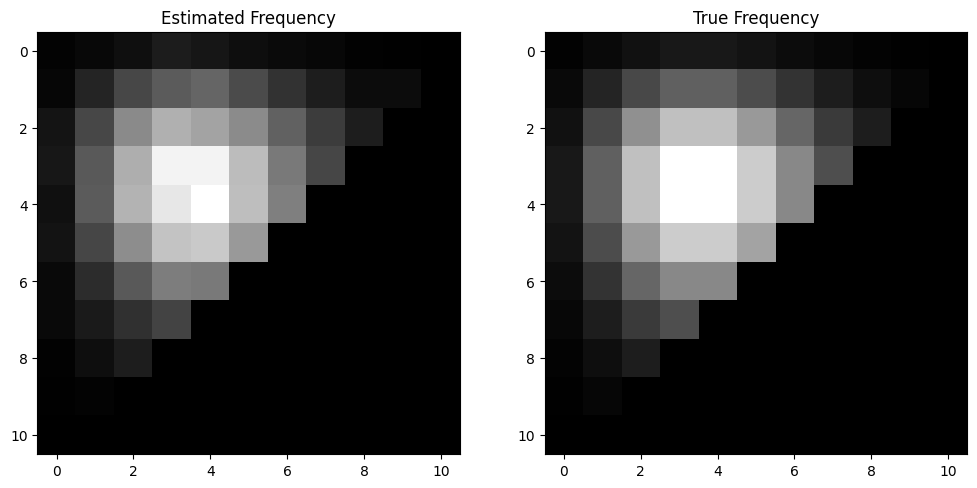

In [ ]:
vals = metropolis_hastings2D_gibbs()
show_comparison2D(vals, poisson2D()*vals.shape[0])

We perform the usual set of χ2 tests to see if the samples come indeed from the desired distribution. If so, the p-values should be uniformly dsitributed between 0 and 1, as seen in the plot below.

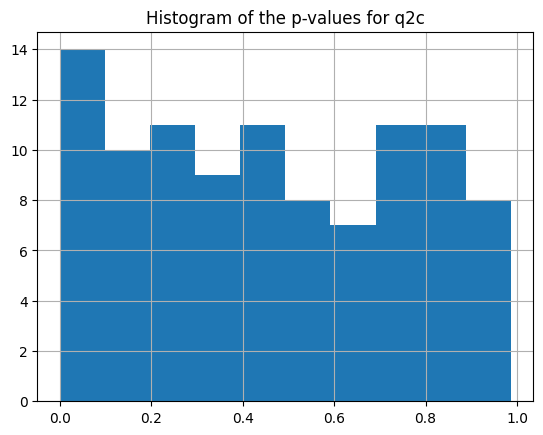

In [ ]:
true_f = poisson2D()
mask = true_f!=0
p_values = []
for i in range(100):
    vals = metropolis_hastings2D_gibbs()[::4] # the values are dependent with each other
    counts = np.empty((11,11))
    for i in range(11):
        for j in range(11):
            counts[i,j] = np.sum(np.logical_and(vals[:,0]==i, vals[:,1]==j))
    true_f = poisson2D()*vals.shape[0]
    p_values.append(stats.chisquare(counts[mask].flatten(), true_f[mask].flatten())[1])

plt.hist(p_values)
plt.title('Histogram of the p-values for q2c')
plt.grid()
plt.show()

# Question 3

Point a

In [ ]:
sampled = np.random.multivariate_normal([0,0], cov = [[1,1/2],[1/2,1]])
params = np.exp(sampled)

Point b

In [ ]:
xlist = stats.norm.rvs(params[0], np.sqrt(params[1]), size = 10)
xlist

array([3.66326288, 1.13598333, 2.49667646, 2.40896704, 1.92840079,
       1.12792588, 4.53791058, 3.24103768, 3.97991259, 2.61288613])

Point c

In [ ]:
def g(Xi, theta, psi):
    A = 1/(np.sqrt(6*np.pi*psi)*np.pi*psi*theta)**Xi.shape[0]
    return np.exp(np.sum(-(Xi - theta)**2/psi - (np.log(theta)**2 - np.log(theta)*np.log(psi)+np.log(psi)**2)*2/3))/A


Point d

[array([2.08172597, 1.95885762]), array([1.51008553, 4.62790657]), array([3.48975325, 4.80962066]), array([3.26049385, 5.76187117]), array([2.87717984, 5.19712318]), array([2.48186802, 4.51815146]), array([4.3366264 , 4.97060766]), array([2.31988659, 4.47779247]), array([2.92531869, 5.07804811]), array([2.58477238, 4.16191525]), array([2.88564667, 2.87450355]), array([3.35363262, 4.72378843]), array([2.59622927, 5.52562446]), array([2.60189726, 5.70612546]), array([3.23151049, 7.21614371]), array([2.50024223, 6.3235107 ]), array([2.69104936, 5.0747333 ]), array([3.72210287, 5.25565048]), array([3.37013168, 5.50806892]), array([3.13871613, 5.17460852]), array([2.40224587, 5.5946907 ]), array([2.43586021, 5.42283811]), array([2.77540445, 4.59815889]), array([2.64943109, 5.44406542]), array([2.83661348, 4.65304331]), array([2.92343919, 5.63396837]), array([2.96851415, 5.49977278]), array([ 3.7262205 , 11.30310893]), array([2.81845593, 7.61131874]), array([3.04030375, 5.34708625]), array([

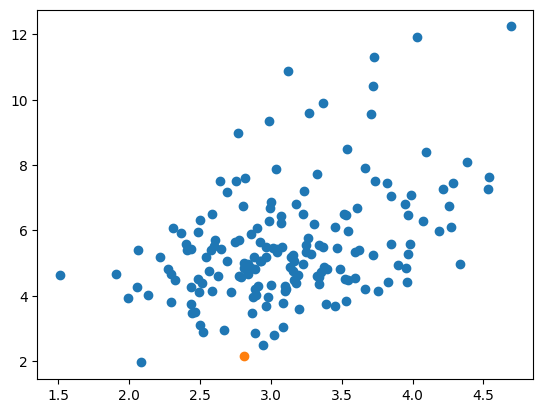

In [ ]:
theta_psi_list = []
x_log = np.random.multivariate_normal([0,0], cov = [[1,1/2],[1/2,1]])
x = np.exp(x_log)
for i in range(10000):
    y_log = np.random.multivariate_normal([0,0], cov = [[1,1/2],[1/2,1]])
    y = np.exp(y_log)

    gx = g(xlist, x[0], x[1])
    gy = g(xlist, y[0], y[1])

    if gy >= gx:
            theta_psi_list.append(y)
            x = y
    else:
        p = np.random.rand(1)
        if (p < gy/gx):
            theta_psi_list.append(y)
            x = y

print(theta_psi_list)
print(params)

theta_psi_list = np.array(theta_psi_list)

plt.scatter(theta_psi_list[:,0], theta_psi_list[:,1])
plt.scatter(params[0], params[1])
plt.show()

Point e

In [ ]:
xlist = stats.norm.rvs(params[0], np.sqrt(params[1]), size = 10)

theta_psi_list = []
x_log = np.random.multivariate_normal([0,0], cov = [[1,1/2],[1/2,1]])
x = np.exp(x_log)
for i in range(100):
    y_log = np.random.multivariate_normal([0,0], cov = [[1,1/2],[1/2,1]])
    y = np.exp(y_log)

    gx = g(xlist, x[0], x[1])
    gy = g(xlist, y[0], y[1])

    if gy >= gx:
            theta_psi_list.append(y)
            x = y
    else:
        p = np.random.rand(1)
        if (p < gy/gx):
            theta_psi_list.append(y)
            x = y

theta_psi_list, params

([array([2.2386218 , 1.02655611]),
  array([2.09154063, 0.87900666]),
  array([1.89080324, 1.19090041]),
  array([1.94313462, 1.09939115])],
 array([2.45275687, 0.77538279]))

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<h3> (1) Simulated Annealing for TSP </h3> 

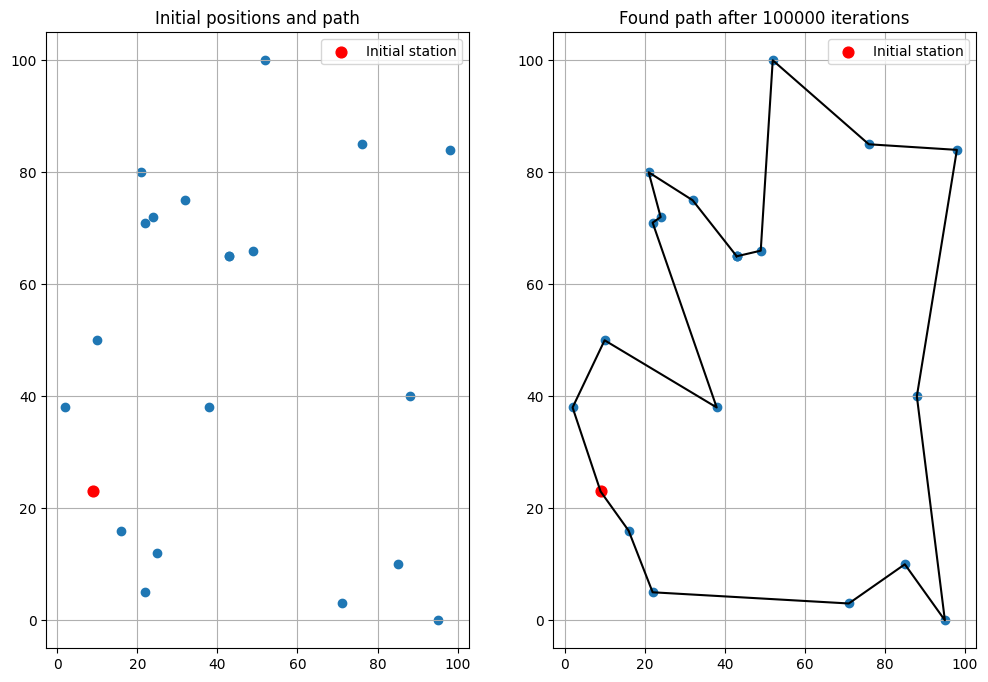

In [ ]:
def cool(k):
    return 1/np.sqrt(1+k)


#permute two random stations (except first and final one)
def permute(x):
    n = x.shape[0]
    y = x.copy()
    idx1 = int(np.random.randint(1, n-1))
    idx2 = int(np.random.randint(1, n-1))
    while idx1 == idx2:
        idx2 = int(np.random.randint(1, n-1))
    t = y[idx1]
    y[idx1] = y[idx2]
    y[idx2] = t
    return y

# gives the cost (sum of euclidean distances) for the current path
def CostEuclid(route,coord):
    dist = [ np.sqrt( (coord[route[N+1] ,0] - coord[route[N] ,0])**2 + (coord[route[N+1] ,1] - coord[route[N] ,1])**2)  for N in range(len(route)-1)]
    return np.sum(dist)

# for the initialization of the positions
def random_coordinates(X):
    C= np.random.randint(0,100+1,[len(X)-1,2]).tolist()
    C.insert(X[-1],C[X[-1]])
    return np.array(C)

# initialization of variables
x = np.array(range(20))
np.random.shuffle(x)
x = np.append(x, x[0])
positions = random_coordinates(x)
costx= CostEuclid(x, positions)
best_cost = CostEuclid(x, positions)

cost_list = [best_cost]
ks = 0.0001

for _ in range(100000):

    T = cool(ks)

    #sampling a new proposal, randomly switching two stations
    y = permute(x)
    costx = CostEuclid(x, positions)
    costy = CostEuclid(y, positions)

    # acccptance or rejection of the proposal
    if costy < costx:
        best_cost = costy
        x = y.copy()
    
    p = np.exp(-(costy - costx)/T)
    u = np.random.uniform(0,1)
    if u < p:
        best_cost = costy
        x = y.copy()

    cost_list.append(best_cost)
    ks = ks+0.0001


fig, axs = plt.subplots(1,2, figsize = (12,8))
axs[0].scatter(positions[:,0],positions[:,1])
axs[0].set_title('Initial positions and path')
axs[0].grid()
axs[0].scatter(positions[0,0], positions[0,1], label = 'Initial station', color = 'r', s = 60)
axs[0].legend()
axs[1].scatter(positions[x][:,0],positions[x][:,1])
axs[1].plot(positions[x][:,0],positions[x][:,1], color = 'black')
axs[1].set_title('Found path after 100000 iterations')
axs[1].grid()
axs[1].scatter(positions[0,0], positions[0,1], label = 'Initial station', color = 'r', s = 60)
axs[1].legend()
plt.show()

<h3> Simulated Annealing using the provided cost matrix </h3>

In [ ]:
# read the file with the cost matrix
data = pd.read_csv('C:/Users/PC/Documents/DTU/SS/Exercises/cost.csv', header = None)
costs = data.values

# gives the cost of the current path using data in the cost matrix
def cost(route):
    tot = 0
    for i in range(len(route)-1):
        tot += costs[route[i], route[i+1]]
    return tot


#initialization
x = np.array(range(20))
np.random.shuffle(x)
x = np.append(x, x[0])
costx = cost(x)

cost_list = [costx]
ks = 0.0001
for _ in range(100000):

    T = cool(ks)
    # sampling a new proposal, randomly switching two stations
    y = permute(x)
    costx = cost(x)
    costy = cost(y)

    #acceptance or rejection of the new proposal
    if costy < costx:
        best_cost = costy
        x = y.copy()
    
    p = np.exp(-(costy - costx)/T)
    u = np.random.uniform(0,1)
    if u < p:
        best_cost = costy
        x = y.copy()

    cost_list.append(best_cost)
    ks = ks+0.0001

print('The found path is:', y)

array([ 1, 18, 19, 10,  2,  6, 17, 16,  0,  9,  3, 11,  5, 14, 13,  8, 15,
       12,  4,  7,  1])

In [ ]:
import numpy as np
from scipy import stats

<h3> (1) Exercise 13 in Chapter 8 of Ross </h3>

In [ ]:
n = 10
a = -5
b = 5
X = np.array([56,101,78,67,93,87,64,72,80,69])

r = 100
mean_res = []
for i in range(r):
    samples = np.random.choice(X,10)
    mean_diff = np.mean(X) - np.mean(samples)
    mean_res = np.append(mean_res,mean_diff)

p = np.sum(np.abs(mean_res)<b)

print('Estimated p is {}'.format(p/r))

Estimated p is 0.76


<h3> (2) Exercise 15 in Chapter 8 of Ross </h3>

In [ ]:
n = 15
X = np.array([5, 4, 9, 6, 21, 17, 11, 20, 7, 10, 21, 15, 13, 16, 8])
r = 10000
var_list = []
for _ in range(r):
    bootstrap = np.random.choice(X,15)
    var_list.append(np.var(bootstrap, ddof = 1))

print('Estimated variance is:',np.var(var_list, ddof = 1))


Estimated variance is: 60.3456410274642


<h3> Bootstrap for Pareto distribution</h3>

Define two functions able to find the median and the mean, along with the bootstrap estimate of the variance

In [ ]:
def median_variance_finder(data):
    r = 100
    n = data.shape[0]
    bootstraps = np.random.choice(data, [n,r])
    medians = np.median(bootstraps, axis = 0)
    return np.median(data), np.var(medians, ddof = 1)

def mean_variance_finder(data):
    r = 100
    n = data.shape[0]
    bootstraps = np.random.choice(data, [n,r])
    means = np.mean(bootstraps, axis = 0)
    return np.mean(data), np.var(means, ddof = 1)

In [ ]:
samples = stats.pareto.rvs(1.05, size = 200)
median, var_med = median_variance_finder(samples)
mean, var_mean = mean_variance_finder(samples)
print('The estimated meadian is: {:.4f}'.format(median))
print('Its bootstrap variance is: {:.4f}\n'.format(var_med))
print('The estimated mean is: {:.4f}'.format(mean))
print('Its bootstrap variance is: {:.4f}'.format(var_mean))

The estimated meadian is: 1.8428
Its bootstrap variance is: 0.0083

The estimated mean is: 7.3530
Its bootstrap variance is: 4.6270


The variance for the estimation of the median is much less with respect to the one for the estimation of the mean. Indeed, the estimation of the mean for the Pareto distribution is a difficult task as seen in previous exercises.